# Gráficos para os dados de cada benchmark

## Dados ordenados pelo números das máquinas

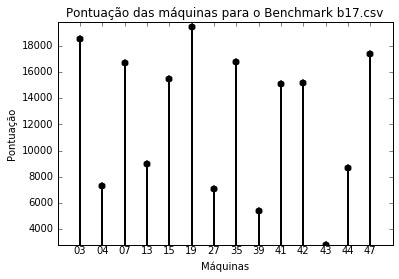

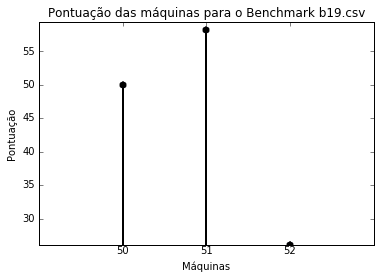

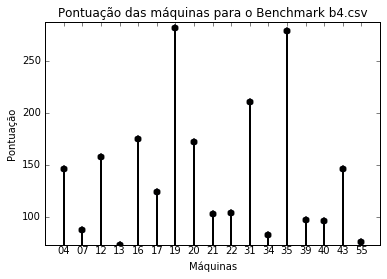

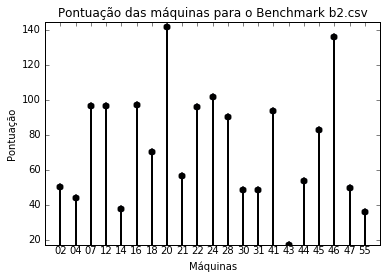

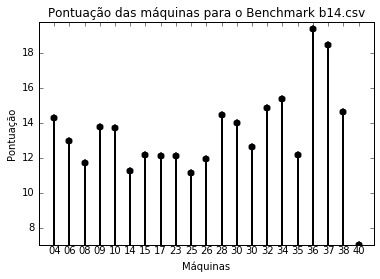

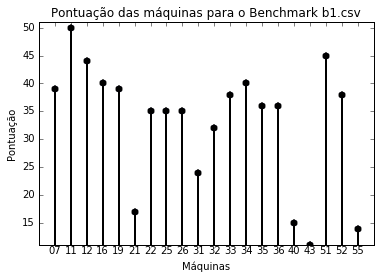

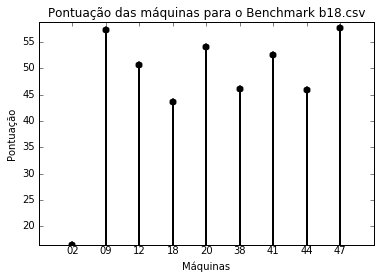

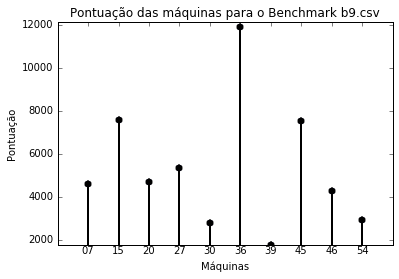

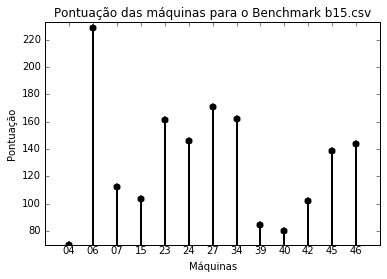

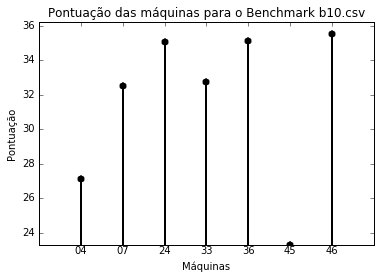

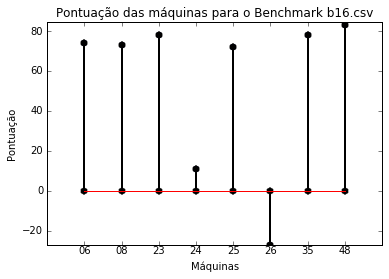

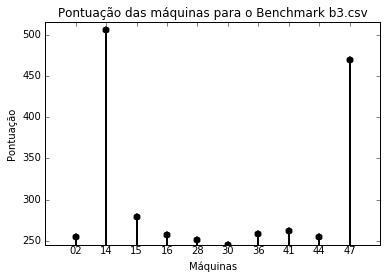

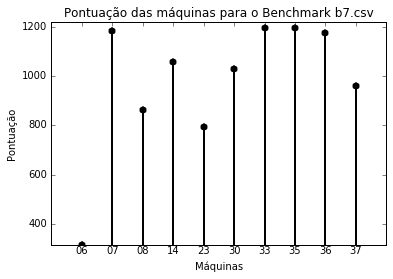

In [13]:
%matplotlib inline
##Bibliotecas importadas
# Biblioteca usada para abrir arquivos CSV
import csv
# Bibilioteca para fazer leitura de datas
from datetime import datetime, timedelta
# Fazer o ajuste de datas no gráfico
import matplotlib.dates as mdate
# Biblioteca mateḿática
import numpy as np
# Bibloteca para traçar gráficos
import matplotlib.pyplot as plt
#Biblioteca para mudar tamanho o gráfico apresentado
import matplotlib.cm as cm
import operator as op
import os
import math

for file in os.listdir('csv'):
    filepath = 'csv/'+file
    dados = list(csv.reader(open('csv/'+file,'r')))

    maquinas = list()
    scores = list()
    
    for dado in dados:
        if (float(dado[1]) != 0):
            scores.append(float(dado[1]))
            maquinas.append(dado[0])

    maquinas, scores = zip(*sorted(zip(maquinas, scores), key=op.itemgetter(0)))

    #Cria grafico e faz com que os valores das máquinas aparecam no eixo x
    x = np.arange(1, len(maquinas)+1)
    markerline, stemlines, baseline = plt.stem(x, scores)
    plt.xticks(x, maquinas)
    
    #define bordas dos gráficos
    mmaq = len(maquinas)+1
    maxsco = max(scores)
    maxsco = maxsco + maxsco/50
    minsco = min(scores)
    
    plt.ylim([minsco,maxsco])
    plt.xlim([0,int(mmaq)])

    # Define característica das linhas
    plt.setp(stemlines, 'linestyle', '-', 'color', 'k', 'linewidth', 2, 'marker', 'h', 'markersize', 7)
    #plt.setp(markerline, 'linestyle', '-')

    # Legendas
    plt.title('Pontuação das máquinas para o Benchmark '+file)
    plt.xlabel('Máquinas')
    plt.ylabel('Pontuação')

    #Salva gŕafico, o mostra no notebook e fecha o plot
    plt.savefig('graphs/' + file + '.png', dpi=300)
    plt.show()
    plt.close()

## Criando tabela da pontuação 'SPEC'

## Dados ordenados em ordem crescente da pontuação

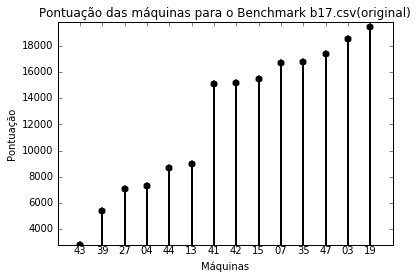

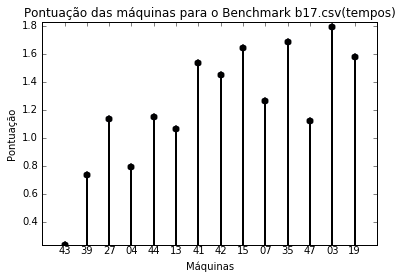

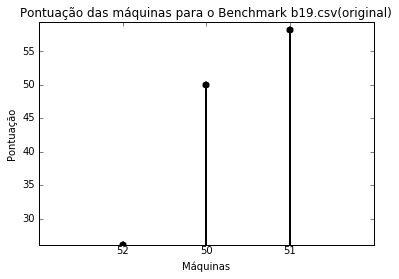

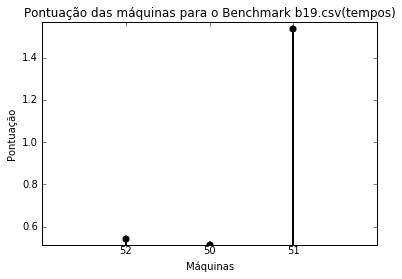

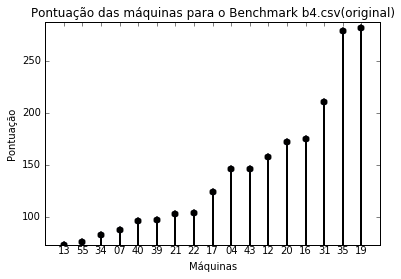

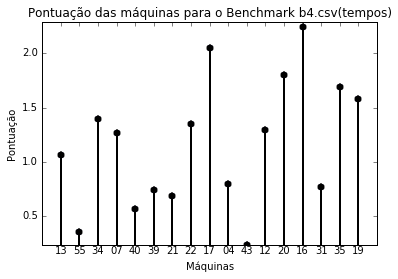

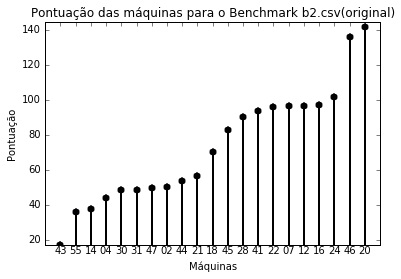

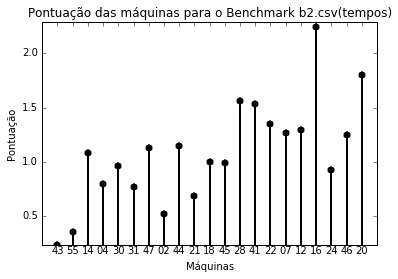

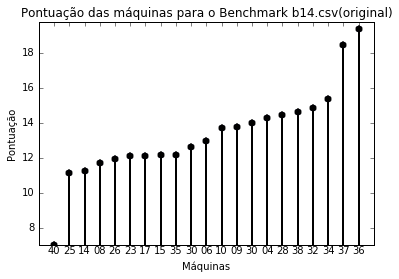

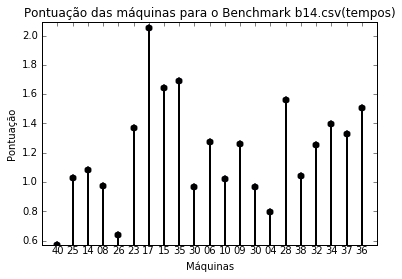

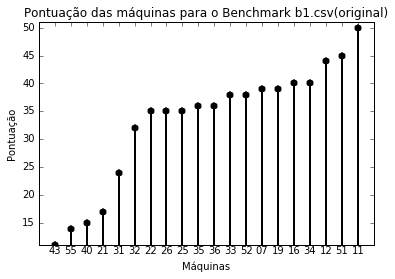

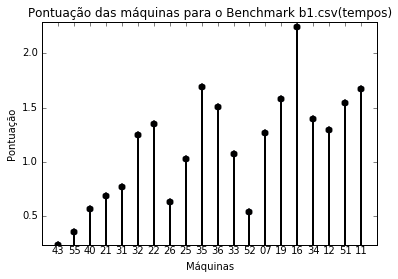

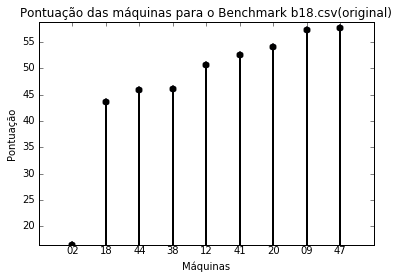

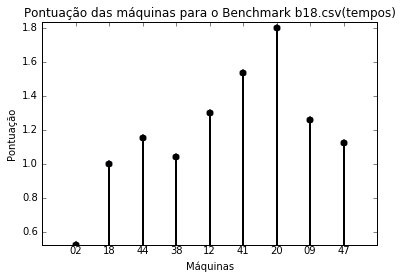

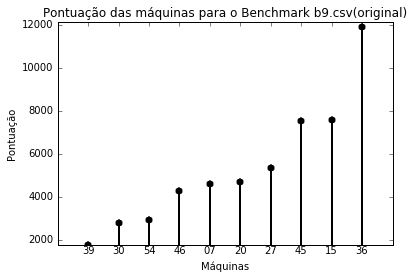

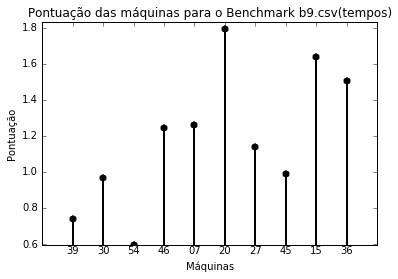

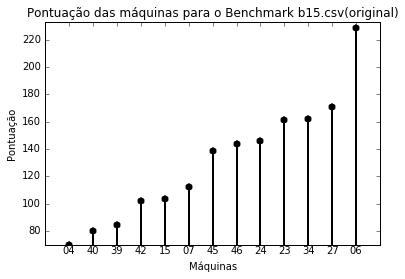

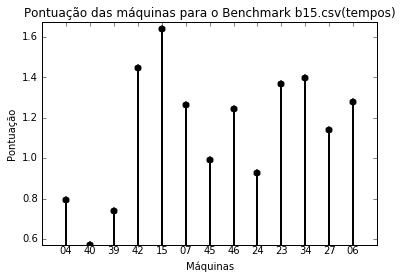

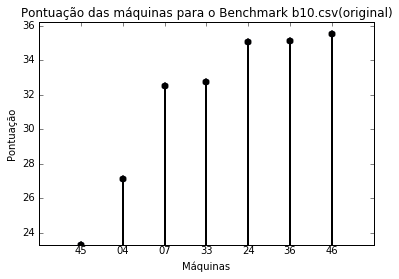

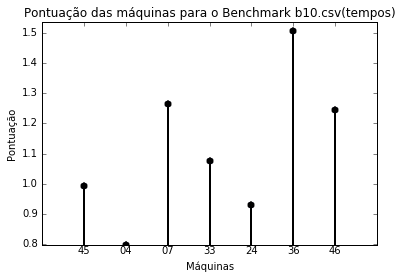

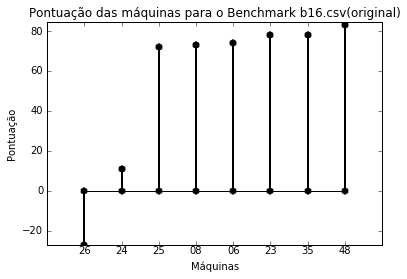

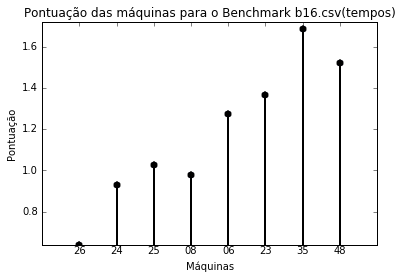

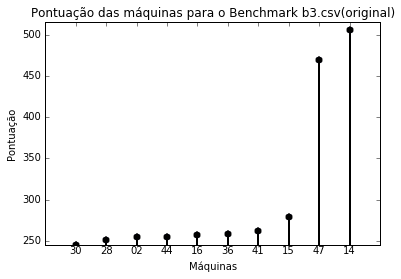

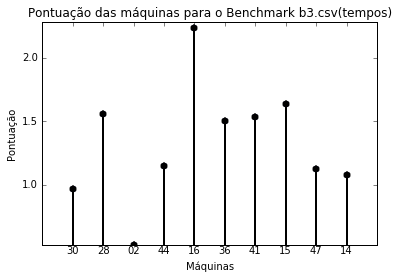

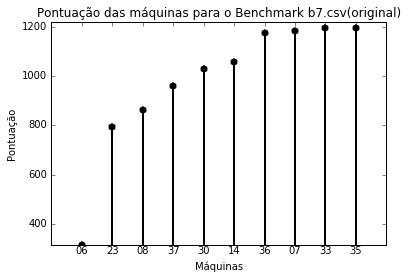

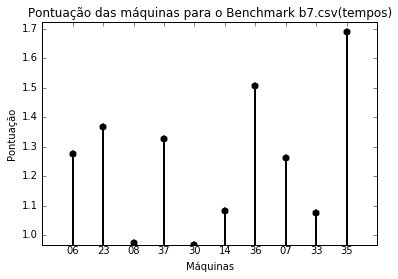

In [14]:
machines = [[] for i in range(57)]

for j in range(57):
    machines[j].append(0)
    
for i in range(1,20):
    for j in range(57):
        machines[j].append(0)
        
    if i != 5 and i != 6 and i != 7 and i != 8 and i != 11 and i != 12 and i != 13:
        dados =list(csv.reader(open('csv/b'+str(i)+'.csv','r')))
            
        for dado in dados:
            index = int(dado[0])
            machines[index][i] = float(dado[2])

dados = list(csv.reader(open('mypc.csv','r')))
dado = dados[0]

for i in range(1,20):
    machines[18][i] = float(dado[i])
    
mscores = []
for i in range(56):
    mscores.append(0.0)
    
mscores[17] = 1.0

for i in range(1,57):
    pM = 1.0
    pR = 1.0
    n = 0
    for j in range(1,20):
        if machines[i][j] != 0:
            n = n + 1
            pM = pM * machines[i][j]
            pR = pR * machines[18][j]
    #print(str(i)+': '+str(pM))
    if pR != 0 and n > 0:
        mscores[i-1] = math.pow(pR,1/n)/math.pow(pM,1/n)
#----------------------------------------------------------------------------------
        
for file in os.listdir('csv'):
    filepath = 'csv/'+file
    dados = list(csv.reader(open('csv/'+file,'r')))
    
    bench = int(file.split('.')[0].split('b')[1])

    maquinas = list()
    scores = list()
    
    for dado in dados:
        if (float(dado[1]) != 0):
            scores.append(float(dado[1]))
            maquinas.append(dado[0])
        
    
    scores, maquinas = zip(*sorted(zip(scores, maquinas), key=op.itemgetter(0)))

    #Cria gráfico com scores fornecidos pelo benchmark
    x = np.arange(1, len(maquinas)+1)
    markerline, stemlines, baseline = plt.stem(x, scores)
    plt.xticks(x, maquinas)
    
    #define bordas dos gráficos
    mmaq = len(maquinas)+1
    maxsco = max(scores)
    maxsco = maxsco + maxsco/50
    minsco = min(scores)

    plt.ylim([minsco,maxsco])
    plt.xlim([0,int(mmaq)])

    # Define característica das linhas
    plt.setp(stemlines, 'linestyle', '-', 'color', 'k', 'linewidth', 2, 'marker', 'h', 'markersize', 7)
    plt.setp(baseline, 'linestyle', '-', 'color', 'k')

    # Legendas
    plt.title('Pontuação das máquinas para o Benchmark '+ file + '(original)')
    plt.xlabel('Máquinas')
    plt.ylabel('Pontuação')

    #Salva gŕafico, o mostra no notebook e fecha o plot
    plt.savefig('graphs/' + file + '2.png', dpi=300)
    plt.show()
    plt.close()
    
    
    
    

    scoresM = list()
    for i in maquinas:
        scoresM.append(mscores[int(i)-1])
    
    #Cria grafico com scores criados 
    x = np.arange(1, len(maquinas)+1)
    markerline, stemlines, baseline = plt.stem(x, scoresM)
    plt.xticks(x, maquinas)
    
    #define bordas dos gráficos
    mmaq = len(maquinas)+1
    maxsco = max(scoresM)
    maxsco = maxsco + maxsco/50
    minsco = min(scoresM)

    plt.ylim([minsco,maxsco])
    plt.xlim([0,int(mmaq)])

    # Define característica das linhas
    plt.setp(stemlines, 'linestyle', '-', 'color', 'k', 'linewidth', 2, 'marker', 'h', 'markersize', 7)
    plt.setp(baseline, 'linestyle', '-', 'color', 'k')

    # Legendas
    plt.title('Pontuação das máquinas para o Benchmark '+ file + '(tempos)')
    plt.xlabel('Máquinas')
    plt.ylabel('Pontuação')

    #Salva gŕafico, o mostra no notebook e fecha o plot
    plt.savefig('graphs/' + file + '2t.png', dpi=300)
    plt.show()
    plt.close()

## Cria tabela dos tempos das máquinas para cada benchmark

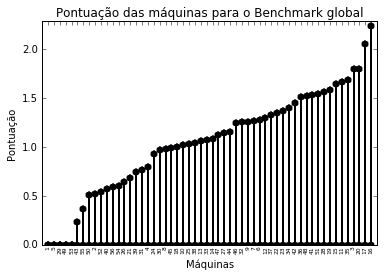

In [15]:
import pylab

machines = [[] for i in range(57)]

for j in range(57):
    machines[j].append(0)
    
for i in range(1,20):
    for j in range(57):
        machines[j].append(0)
        
    if i != 5 and i != 6 and i != 7 and i != 8 and i != 11 and i != 12 and i != 13:
        dados =list(csv.reader(open('csv/b'+str(i)+'.csv','r')))
            
        for dado in dados:
            index = int(dado[0])
            machines[index][i] = float(dado[2])

dados = list(csv.reader(open('mypc.csv','r')))
dado = dados[0]

for i in range(1,20):
    machines[18][i] = float(dado[i])
    
mscores = []
for i in range(56):
    mscores.append(0.0)
    
mscores[17] = 1.0

for i in range(1,57):
    pM = 1.0
    pR = 1.0
    n = 0
    for j in range(1,20):
        if machines[i][j] != 0:
            n = n + 1
            pM = pM * machines[i][j]
            pR = pR * machines[18][j]
    #print(str(i)+': '+str(pM))
    if pR != 0 and n > 0:
        mscores[i-1] = math.pow(pR,1/n)/math.pow(pM,1/n)


maqx = []
for i in range(1,57):
    maqx.append(i)
    
mscores, maqx = zip(*sorted(zip(mscores, maqx), key=op.itemgetter(0)))

#Cria grafico e faz com que os valores das máquinas aparecam no eixo x
x = np.arange(1, len(maqx)+1)
markerline, stemlines, baseline = plt.stem(x, mscores)
plt.xticks(x, maqx, fontsize=6, rotation='vertical')
   
#define bordas dos gráficos
mmaq = len(maqx)+1
maxsco = max(mscores)
maxsco = maxsco + maxsco/50
minsco = min(mscores)

plt.ylim([minsco,maxsco])
plt.xlim([0,int(mmaq)])

# Define característica das linhas
plt.setp(stemlines, 'linestyle', '-', 'color', 'k', 'linewidth', 2, 'marker', 'h', 'markersize', 7)
plt.setp(baseline, 'linestyle', '-', 'color', 'k')

# Legendas
plt.title('Pontuação das máquinas para o Benchmark global')
plt.xlabel('Máquinas')
plt.ylabel('Pontuação')

pylab.rcParams['xtick.major.pad']='1'

#Salva gŕafico, o mostra no notebook e fecha o plot
plt.savefig('graphs/global.png', dpi=300)
plt.show()
plt.close()
    
